In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project/insurance_cust_retention.csv')

In [4]:
df.head()

,Marital Status,AGE,Gender,Car Value,Years of No Claims Bonus,Annual Mileage,Payment Method,Acquisition Channel,Years of Tenure with Current Provider,Price,Actual Change in Price vs last Year,% Change in Price vs last Year,Grouped Change in Price,Renewed?
0,M,45,F,500,4,6000,Monthly,Inbound,4,289.4,-11.94,-3.96%,-0.05,0
1,M,40,M,3000,8,6000,Monthly,Inbound,4,170.4,45.62,37%,0.35,1
2,S,25,F,4000,4,4000,Monthly,Inbound,4,466.1,-123.15,-21%,-0.2,1
3,M,42,M,1800,9,10000,Annual,Inbound,4,245.1,2.34,1%,0,1
4,M,59,M,5000,9,3000,Annual,Inbound,4,240.5,42.56,22%,0.2,0


In [5]:
df.tail()

,Marital Status,AGE,Gender,Car Value,Years of No Claims Bonus,Annual Mileage,Payment Method,Acquisition Channel,Years of Tenure with Current Provider,Price,Actual Change in Price vs last Year,% Change in Price vs last Year,Grouped Change in Price,Renewed?
20015,M,49,M,12000,8,12000,Annual,Outbound,3,507.2,81.50,19%,0.2,0
20016,M,47,M,3000,3,9000,Annual,Outbound,3,303.9,66.74,28%,0.3,0
20017,M,50,M,3200,7,6999,Annual,Aggreg,3,210.6,22.90,12%,0.1,0
20018,D,50,F,9000,7,7999,Annual,Aggreg,3,263.4,55.23,27%,0.25,0
20019,S,48,F,2500,6,7999,Annual,Direct,3,376.7,42.99,13%,0.15,1


In [6]:
df.columns

Index(['Marital Status', 'AGE', 'Gender', 'Car Value',
       'Years of No Claims Bonus', 'Annual Mileage', 'Payment Method',
       'Acquisition Channel', 'Years of Tenure with Current Provider', 'Price',
       'Actual Change in Price vs last Year', '% Change in Price vs last Year',
       'Grouped Change in Price', 'Renewed?'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20020 entries, 0 to 20019
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Marital Status                         20020 non-null  object 
 1   AGE                                    20020 non-null  int64  
 2   Gender                                 20020 non-null  object 
 3   Car Value                              20020 non-null  int64  
 4   Years of No Claims Bonus               20020 non-null  int64  
 5   Annual Mileage                         20020 non-null  int64  
 6   Payment Method                         20020 non-null  object 
 7   Acquisition Channel                    20020 non-null  object 
 8   Years of Tenure with Current Provider  20020 non-null  int64  
 9   Price                                  20017 non-null  float64
 10  Actual Change in Price vs last Year    20020 non-null  object 
 11  % 

In [8]:
df.describe()

,AGE,Car Value,Years of No Claims Bonus,Annual Mileage,Years of Tenure with Current Provider,Price,Renewed?
count,20020.000000,20020.000000,20020.000000,20020.000000,20020.000000,20017.000000,20020.000000
mean,44.744555,3686.924126,5.757143,6528.061239,2.479620,422.485702,0.621329
std,12.680561,3981.033913,2.894185,3585.303675,0.853137,262.424727,0.485068
min,17.000000,0.000000,0.000000,1.000000,1.000000,96.000000,0.000000
25%,36.000000,1000.000000,3.000000,4000.000000,2.000000,264.200000,0.000000
50%,44.000000,2500.000000,6.000000,5200.000000,2.000000,357.300000,1.000000
75%,52.000000,5000.000000,9.000000,9000.000000,3.000000,501.700000,1.000000
max,89.000000,60000.000000,9.000000,70000.000000,4.000000,4449.900000,1.000000


In [9]:
df.rename(columns = {'Marital Status':'Marital_Status','Car Value':'Car_Value','Years of No Claims Bonus':'Year_of_No_Claims_Bonus','Annual Mileage':'Annual_Mileage','Payment Method':'Payment_Method','Acquisition Channel':'Acquisition_Channel','Years of Tenure with Current Provider':'Years_of_Tenure_with_Current_Provider','Actual Change in Price vs last Year':'Actual_Change_in_Price_vs_last_Year','% Change in Price vs last Year':'%_Change_in_Price_vs_last_Year','Grouped Change in Price':'Grouped_Change_in_Price'}, inplace = True)

In [10]:
df.isnull().sum()

Marital_Status                           0
AGE                                      0
Gender                                   0
Car_Value                                0
Year_of_No_Claims_Bonus                  0
Annual_Mileage                           0
Payment_Method                           0
Acquisition_Channel                      0
Years_of_Tenure_with_Current_Provider    0
Price                                    3
Actual_Change_in_Price_vs_last_Year      0
%_Change_in_Price_vs_last_Year           0
Grouped_Change_in_Price                  0
Renewed?                                 0
dtype: int64

In [11]:
df1 = df.copy()

In [12]:
df1['Price'] = df1['Price'].fillna(df1['Price'].mean())

In [13]:
df1.isnull().sum()

Marital_Status                           0
AGE                                      0
Gender                                   0
Car_Value                                0
Year_of_No_Claims_Bonus                  0
Annual_Mileage                           0
Payment_Method                           0
Acquisition_Channel                      0
Years_of_Tenure_with_Current_Provider    0
Price                                    0
Actual_Change_in_Price_vs_last_Year      0
%_Change_in_Price_vs_last_Year           0
Grouped_Change_in_Price                  0
Renewed?                                 0
dtype: int64

In [14]:
df1['Marital_Status'].value_counts()
df1['Gender'].value_counts()
df1['Payment_Method'].value_counts()
df1['Acquisition_Channel'].value_counts()

Inbound     16067
Direct       3938
Aggreg         12
Outbound        3
Name: Acquisition_Channel, dtype: int64

In [15]:
df1['Marital_Status'] = df1['Marital_Status'].replace({'M': 0,'S': 1,'D': 2,'W': 3,'V': 4})
df1['Gender'] = df1['Gender'].replace({'M': 0,'F': 1,'C': 2})
df1['Payment_Method'] = df1['Payment_Method'].replace({'Monthly': 0,'Annual': 1})
df1['Acquisition_Channel'] = df1['Acquisition_Channel'].replace({'Inbound': 0,'Direct': 1,'Aggreg': 2,'Outbound': 3})

In [16]:
df1.head()

,Marital_Status,AGE,Gender,Car_Value,Year_of_No_Claims_Bonus,Annual_Mileage,Payment_Method,Acquisition_Channel,Years_of_Tenure_with_Current_Provider,Price,Actual_Change_in_Price_vs_last_Year,%_Change_in_Price_vs_last_Year,Grouped_Change_in_Price,Renewed?
0,0,45,1,500,4,6000,0,0,4,289.4,-11.94,-3.96%,-0.05,0
1,0,40,0,3000,8,6000,0,0,4,170.4,45.62,37%,0.35,1
2,1,25,1,4000,4,4000,0,0,4,466.1,-123.15,-21%,-0.2,1
3,0,42,0,1800,9,10000,1,0,4,245.1,2.34,1%,0,1
4,0,59,0,5000,9,3000,1,0,4,240.5,42.56,22%,0.2,0


In [17]:
df1['Price'] = df1['Price'].astype('int')

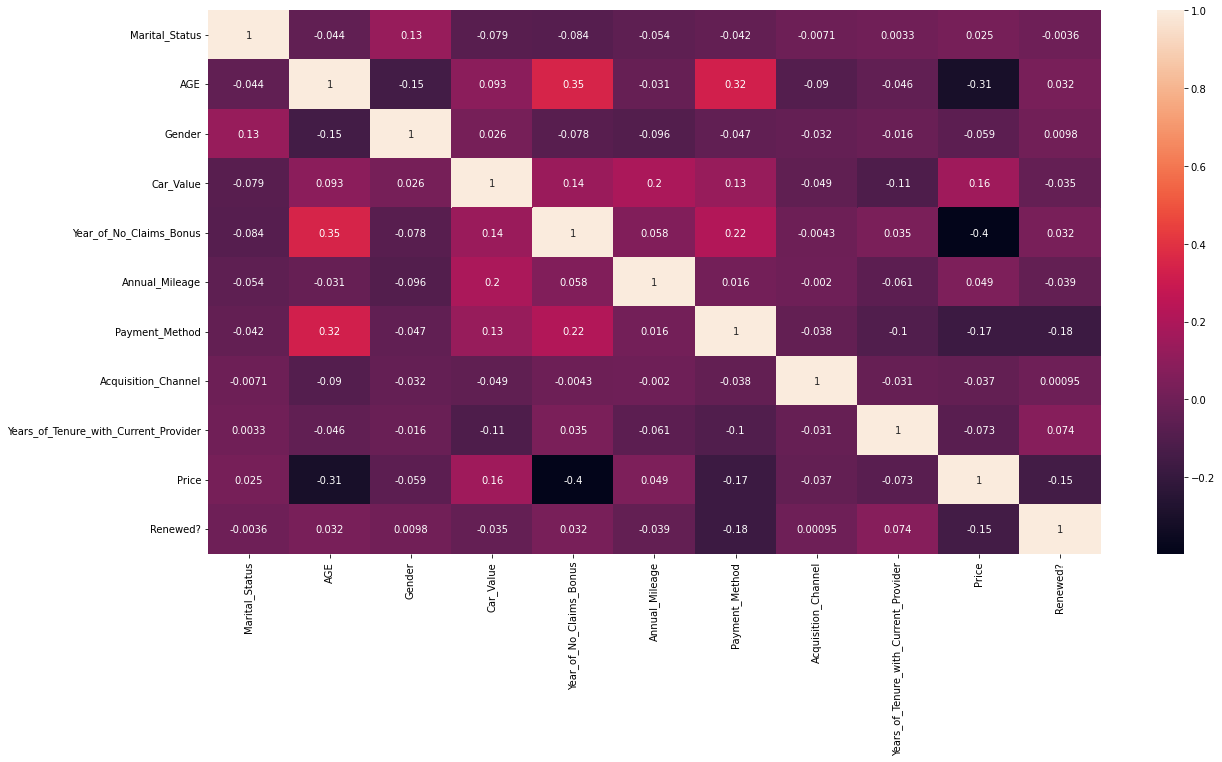

In [18]:
plt.figure(figsize = (20,10))
sns.heatmap( df1.corr(),annot = True)
plt.show()

In [19]:
df1.drop(['Actual_Change_in_Price_vs_last_Year','%_Change_in_Price_vs_last_Year','Grouped_Change_in_Price'], axis = 1,inplace = True)
df1.columns

Index(['Marital_Status', 'AGE', 'Gender', 'Car_Value',
       'Year_of_No_Claims_Bonus', 'Annual_Mileage', 'Payment_Method',
       'Acquisition_Channel', 'Years_of_Tenure_with_Current_Provider', 'Price',
       'Renewed?'],
      dtype='object')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20020 entries, 0 to 20019
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Marital_Status                         20020 non-null  int64
 1   AGE                                    20020 non-null  int64
 2   Gender                                 20020 non-null  int64
 3   Car_Value                              20020 non-null  int64
 4   Year_of_No_Claims_Bonus                20020 non-null  int64
 5   Annual_Mileage                         20020 non-null  int64
 6   Payment_Method                         20020 non-null  int64
 7   Acquisition_Channel                    20020 non-null  int64
 8   Years_of_Tenure_with_Current_Provider  20020 non-null  int64
 9   Price                                  20020 non-null  int64
 10  Renewed?                               20020 non-null  int64
dtypes: int64(11)
memory usage: 1

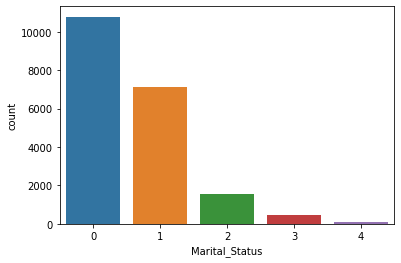

In [21]:
sns.countplot(data = df1,x= 'Marital_Status')

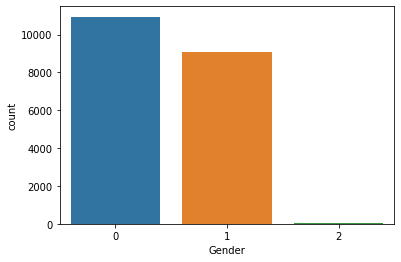

In [22]:
sns.countplot(data = df1,x = 'Gender')

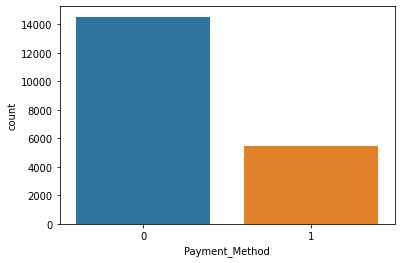

In [23]:
sns.countplot(data = df1,x = 'Payment_Method')

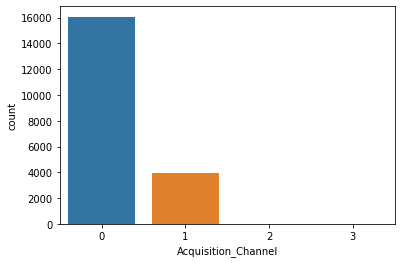

In [24]:
sns.countplot(data = df1 , x = 'Acquisition_Channel')

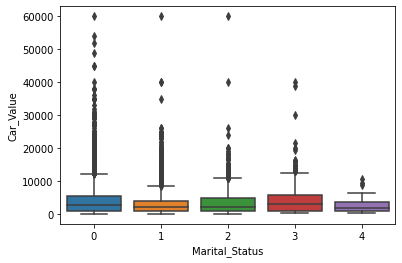

In [25]:
sns.boxplot(data = df1 , x = 'Marital_Status',y = 'Car_Value')

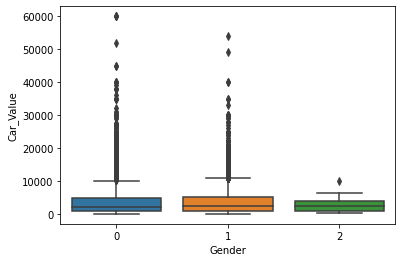

In [26]:
sns.boxplot(data = df1 , x = 'Gender',y = 'Car_Value')

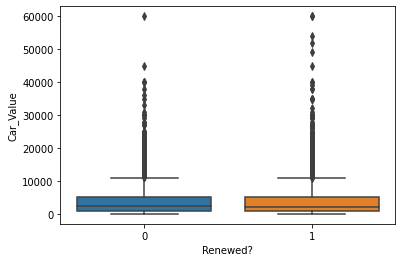

In [27]:
sns.boxplot(data = df1 , x = "Renewed?",y = "Car_Value")

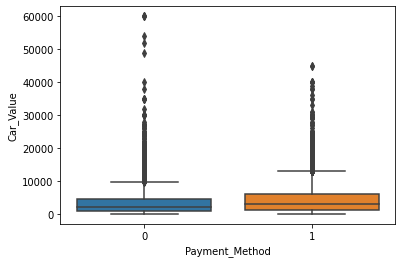

In [28]:
sns.boxplot(data = df1, x = "Payment_Method",y = "Car_Value")

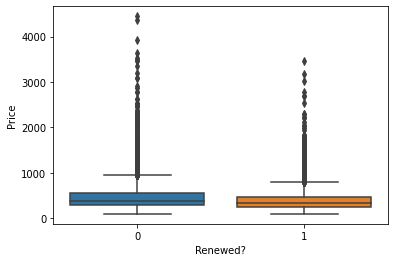

In [29]:
sns.boxplot(data = df1 , x = "Renewed?",y = "Price")

In [30]:
X=df1.drop("Renewed?",axis=1)
y = df1["Renewed?"]
df1.head()

,Marital_Status,AGE,Gender,Car_Value,Year_of_No_Claims_Bonus,Annual_Mileage,Payment_Method,Acquisition_Channel,Years_of_Tenure_with_Current_Provider,Price,Renewed?
0,0,45,1,500,4,6000,0,0,4,289,0
1,0,40,0,3000,8,6000,0,0,4,170,1
2,1,25,1,4000,4,4000,0,0,4,466,1
3,0,42,0,1800,9,10000,1,0,4,245,1
4,0,59,0,5000,9,3000,1,0,4,240,0


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state = 1)

Accuracy 63.417587407295294
[[ 410  298]
 [2119 3780]]


Text(0.5, 1.0, 'Predicted Vs Actual value')

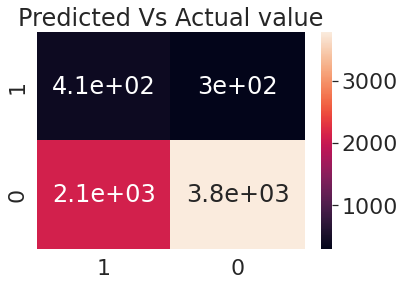

In [32]:
LR = LogisticRegression()
logmodel = LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print("Accuracy",LR.score(X_test,y_test)*100)
sns.set(font_scale = 2)
cm = confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm , annot = True,xticklabels = [1,0],yticklabels=[1,0])
plt.title("Predicted Vs Actual value")

Accuracy 57.257454215226275
[[1132 1427]
 [1397 2651]]


Text(0.5, 1.0, 'Predicted Vs Actual value')

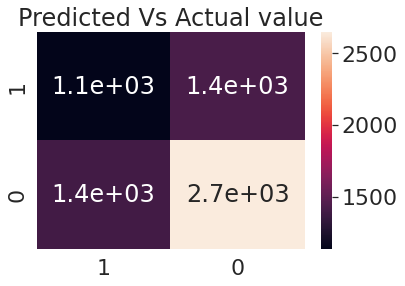

In [33]:
DT = DecisionTreeClassifier()
dmodel = DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
print("Accuracy",DT.score(X_test,y_test)*100)
sns.set(font_scale = 2)
cm = confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot = True,xticklabels = [1,0],yticklabels = [1,0])
plt.title("Predicted Vs Actual value")

Accuracy 64.46193431209323
[[ 854  673]
 [1675 3405]]


Text(0.5, 1.0, 'Predicted Vs Actual value')

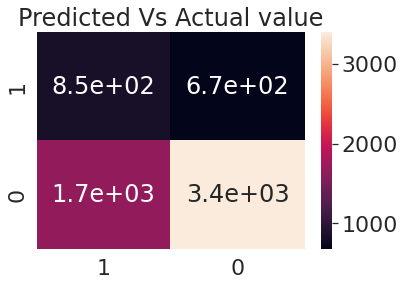

In [34]:
RF = RandomForestClassifier()
Rmodel = RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print("Accuracy",RF.score(X_test,y_test)*100)
sns.set(font_scale = 2)
cm = confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot = True,xticklabels = [1,0],yticklabels = [1,0])
plt.title("Predicted Vs Actual value")

Accuracy 56.78825488118662
[[ 756 1082]
 [1773 2996]]


Text(0.5, 1.0, 'Predicted Vs Actual value')

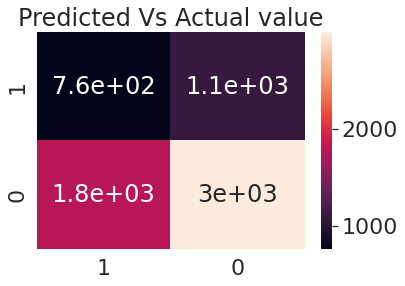

In [35]:
KNN = KNeighborsClassifier()
Kmodel = KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print("Accuracy",KNN.score(X_test,y_test)*100)
sns.set(font_scale = 2)
cm = confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot = True ,xticklabels = [1,0],yticklabels = [1,0])
plt.title("Predicted Vs Actual value")

In [36]:
RF.predict([[0,40,0,3000,8,6000,0,0,4,170]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [37]:
def classify(num):
    if num==0:
        return 'No Renewed'
    else:
        return 'Renewed'

In [38]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 33.6 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 2.3 MB 9.7 MB/s 
     |████████████████████████████████| 213 kB 54.7 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 106 kB 57.4 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 278 kB 82.4 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 80 kB 10.3 MB/s 
     |████████████████████████████████| 68 kB 7.8 MB/s 
     |████████████████████████████████| 68 kB 7.1 MB/s 
     |████████████████████████████████| 68 kB 6.9 MB/s 
     |████████████████████████████████| 68 kB 7.1 

In [39]:
import gradio as gr
def predict_retention(Marital_Status,AGE,Gender,Car_Value,Years_of_No_Claims_Bonus,Annual_Mileage,Payment_Method,Acquisition_Channel,Years_of_Tenure_with_Current_Provider, Price):
    input_array=np.array([Marital_Status,AGE,Gender,Car_Value,Years_of_No_Claims_Bonus,Annual_Mileage,Payment_Method,Acquisition_Channel,Years_of_Tenure_with_Current_Provider, Price])
    prediction=Rmodel.predict(input_array.reshape(1, -1))
    output=classify(prediction[0])
    if output=='No retention':
      return [(0,output)]
    else:
      return [(1,output)]

In [40]:
Marital_Status = gr.inputs.Slider(maximum=4, default=0, label="Marital_Status")
AGE = gr.inputs.Slider(minimum=0, maximum=89, default=0, label="AGE")
Gender = gr.inputs.Slider(minimum=0, maximum=2, default=0, label="Gender")
Car_Value = gr.inputs.Slider(minimum=0, maximum=60000, default=0, label="Car_Value")
Years_of_No_Claims_Bonus = gr.inputs.Slider(minimum=0, maximum=9, default=0, label="Years_of_No_Claims_Bonus")
Annual_Mileage = gr.inputs.Slider(minimum=0, maximum=70000, default=0, label="Annual_Mileage")
Payment_Method = gr.inputs.Slider(minimum=0, maximum=1, default=0, label="Payment_Method")
Acquisition_Channel = gr.inputs.Slider(minimum=0, maximum=3, default=0, label="Acquisition_Channel")
Years_of_Tenure_with_Current_Provider = gr.inputs.Slider(minimum=0, maximum=4, default=0, label="Years_of_Tenure_with_Current_Provider")
Price = gr.inputs.Slider(minimum=0, maximum=4449, default=0, label="Price")

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:88: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [41]:
result=gr.outputs.HighlightedText(color_map={ "No Renewed": "lightgreen",
        "Renewed": "pink"})

/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:239: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/components.py:3169: UserWarning: The 'color_map' parameter has been moved from the constructor to `HighlightedText.style()` 
  warnings.warn(


In [ ]:
gr.Interface(predict_retention, inputs=[Marital_Status,AGE,Gender,Car_Value,Years_of_No_Claims_Bonus,Annual_Mileage,Payment_Method,Acquisition_Channel,Years_of_Tenure_with_Current_Provider, Price], outputs=result,live=True).launch(debug=True,share=True)

/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_2
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_3
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_4
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_5
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_6
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:218: UserWarning: api_name predict already exists, using predict_7
  warnings.warn(
/usr/local/lib/pytho

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://165782e54719271b.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 